In [1]:
import torch
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(4)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## test Activation Function

In [3]:
x = torch.linspace(-5, 5, 200) # -5 ~ 5를 200개로 자르기
x = Variable(x)
x_np = x.data.numpy()

In [4]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# f(x)=1/beta∗log(1+exp(beta∗xi))

/home/cloudera/.local/lib/python3.6/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/cloudera/.local/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


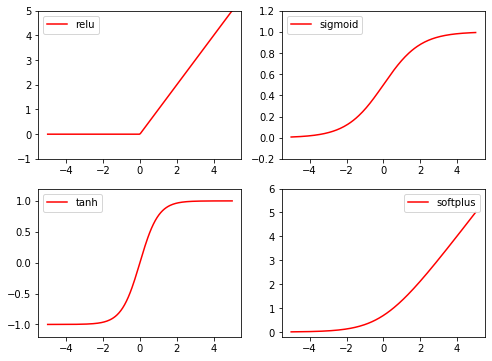

In [5]:
plt.figure(1, figsize=(8,6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')
plt.show()


## Make Data

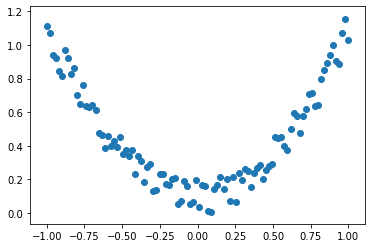

In [6]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


## Define NonLinear Model

In [7]:
hidden = nn.Linear(1, 20, bias=True)
activation = nn.ReLU()
#activation = nn.Sigmoid()
optput = nn.Linear(20, 1, bias=True)

nn.Linear Parameters :  nn.Linear(in_features, out_features, bias) 
1. in_features – size of each input sample 
2. out_features – size of each output sample  
3. bias – If set to False, the layer will not learn an additive bias. Default: True

In [8]:
net = nn.Sequential(hidden, activation, optput)
# 모듈 합쳐주기


## Define Optimizer and Loss Function

In [9]:
#optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

Adam : https://arxiv.org/pdf/1412.6980.pdf


## Train

In [10]:
x.size()

torch.Size([100, 1])

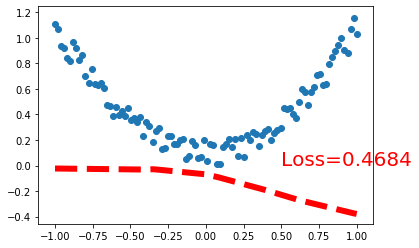

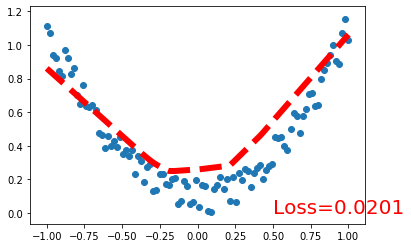

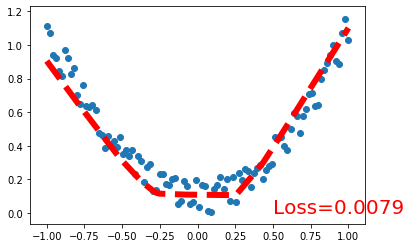

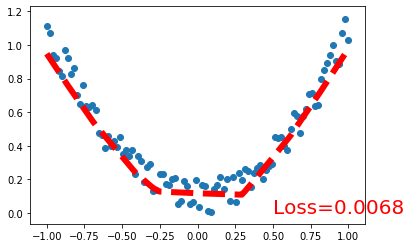

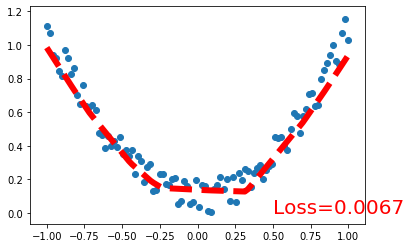

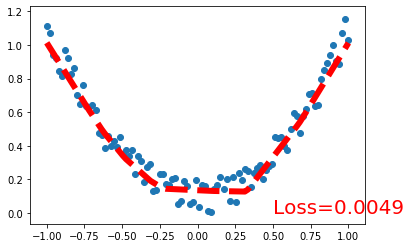

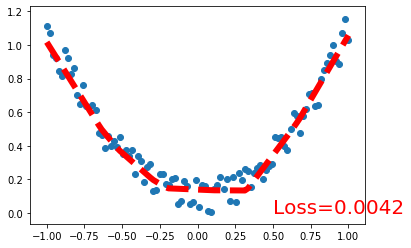

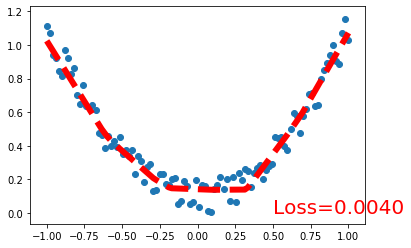

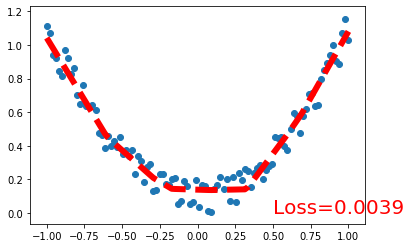

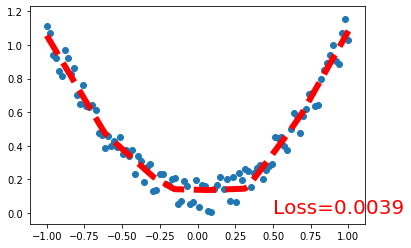

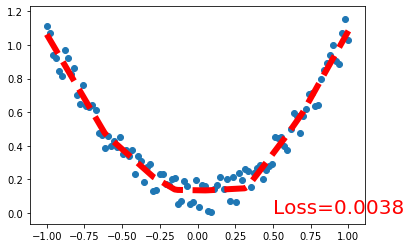

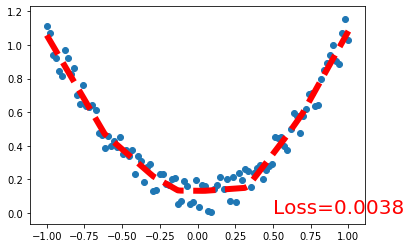

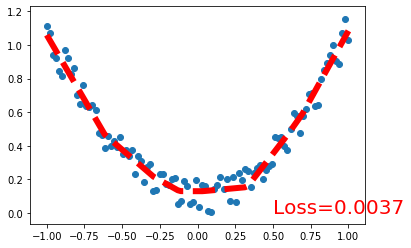

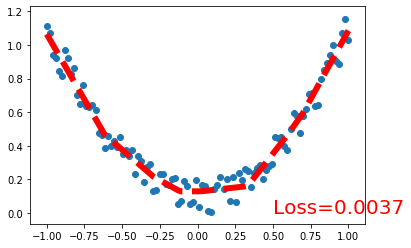

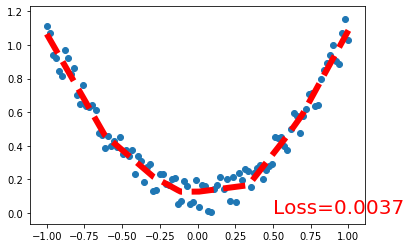

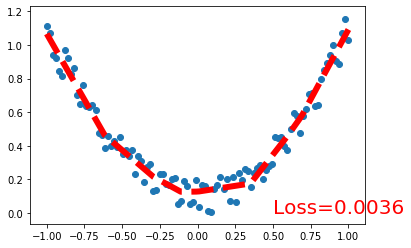

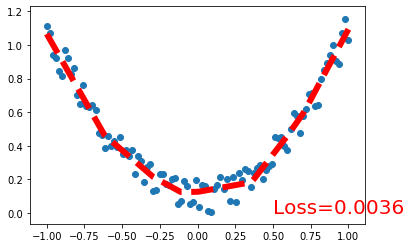

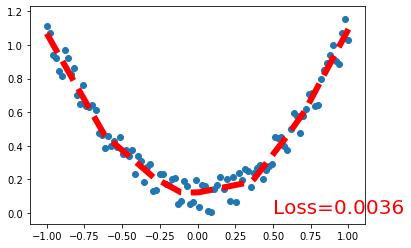

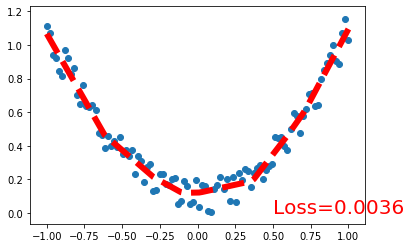

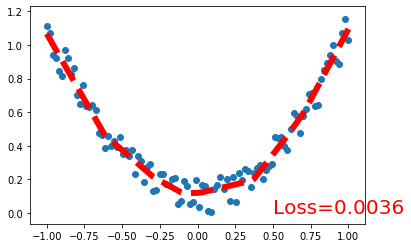

In [11]:
for t in range(200):
    prediction = net(x)
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10  == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r--', lw=6)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict={'size':20, 'color':'red'})
        plt.show()
        plt.pause(0.2)
        
plt.ioff()


## save and Load

In [12]:
torch.save(net.state_dict(), 'pkl/nonlinear.pkl')
net.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.7566],
                      [ 1.3625],
                      [ 0.3805],
                      [ 0.1518],
                      [-0.3515],
                      [ 0.1833],
                      [-1.2776],
                      [-0.9346],
                      [-0.1294],
                      [-0.1995],
                      [-0.1947],
                      [ 0.1308],
                      [-0.6850],
                      [-0.0981],
                      [-0.9056],
                      [-0.0502],
                      [ 0.1673],
                      [-0.7908],
                      [ 1.3582],
                      [ 0.8411]])),
             ('0.bias',
              tensor([-0.4657, -0.5018, -0.2271, -0.5576,  0.2109, -0.2732, -0.1253, -0.5756,
                      -0.1329,  0.0664, -0.7663,  0.4558, -0.4223, -0.2109, -0.5582, -0.7425,
                       0.1567, -0.2309, -0.0223, -0.5939])),
             ('2.weight',
            

In [13]:
net.load_state_dict(torch.load('pkl/nonlinear.pkl'))
net.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.7566],
                      [ 1.3625],
                      [ 0.3805],
                      [ 0.1518],
                      [-0.3515],
                      [ 0.1833],
                      [-1.2776],
                      [-0.9346],
                      [-0.1294],
                      [-0.1995],
                      [-0.1947],
                      [ 0.1308],
                      [-0.6850],
                      [-0.0981],
                      [-0.9056],
                      [-0.0502],
                      [ 0.1673],
                      [-0.7908],
                      [ 1.3582],
                      [ 0.8411]])),
             ('0.bias',
              tensor([-0.4657, -0.5018, -0.2271, -0.5576,  0.2109, -0.2732, -0.1253, -0.5756,
                      -0.1329,  0.0664, -0.7663,  0.4558, -0.4223, -0.2109, -0.5582, -0.7425,
                       0.1567, -0.2309, -0.0223, -0.5939])),
             ('2.weight',
            


## Entire save and load

In [14]:
torch.save(net,'pkl/net.pkl')

In [15]:
net = torch.load('pkl/net.pkl')